In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Carica il dataset Iris come DataFrame
iris = load_iris(as_frame=True)
# Seleziona solo le feature "petal length" e "petal width"
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
# Crea il target binario: True se è "Iris-setosa", altrimenti False
y = (iris.target == 0)
# Inizializza il modello Perceptron con un seed fisso per la riproducibilità
per_clf = Perceptron(random_state=42)
# Allena il Perceptron sui dati selezionati
per_clf.fit(X, y)
# Nuovi esempi da classificare (lunghezza e larghezza del petalo)
X_new = [[2, 0.5], [3, 1]]
# Predice se i nuovi fiori sono "Iris-setosa" (True) o no (False)
y_pred = per_clf.predict(X_new)




In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# --- Caricamento del dataset California Housing ---
housing = fetch_california_housing()
X = housing.data            # Feature (es. numero di stanze, popolazione, ecc.)
y = housing.target          # Target: valore medio delle case in una zona

# --- Suddivisione dei dati in training, validation e test ---
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)  # 75% train+valid, 25% test
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)  # 56.25% train, 18.75% valid

# --- Definizione del modello MLP ---
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],  # Tre hidden layer da 50 neuroni ciascuno
    activation='relu',                # Funzione di attivazione ReLU
    solver='adam',                    # Ottimizzatore Adam
    alpha=0.0001,                     # Termina di regolarizzazione L2 (per evitare overfitting)
    max_iter=500,                     # Iterazioni massime
    random_state=42                   # Seed per riproducibilità
)

# --- Creazione della pipeline ---
# Include uno StandardScaler per normalizzare le feature (molto importante per MLP)
pipeline = make_pipeline(StandardScaler(), mlp_reg)

# --- Addestramento del modello ---
pipeline.fit(X_train, y_train)

# --- Predizione e valutazione sul validation set ---
y_pred = pipeline.predict(X_valid)                                  # Predizioni sul set di validazione
rmse = sqrt(mean_squared_error(y_valid, y_pred))          # Calcolo della Root Mean Squared Error

# --- Stampa dell'errore ---
print(f"Root Mean Squared Error (Validation): {rmse:.3f}")

Root Mean Squared Error (Validation): 0.505


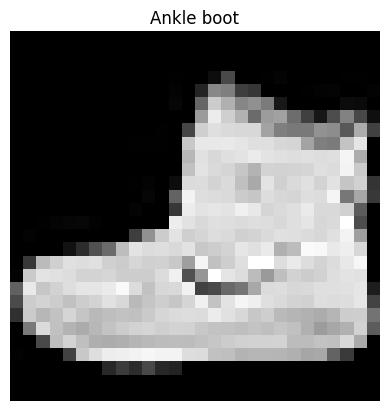

In [8]:
import tensorflow as tf  # Importa TensorFlow, una libreria per costruire e addestrare reti neurali

# --- Caricamento del dataset Fashion MNIST ---
# Fashion MNIST è un dataset con immagini 28x28 pixel in scala di grigi di vestiti (10 categorie)
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# Carica i dati e li divide in set di training e test
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# --- Suddivisione in sottoinsiemi: training e validation ---
# Prende tutti i dati tranne gli ultimi 5000 per addestrare (training)
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

# Gli ultimi 5000 dati vengono usati per la validazione (validation)
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# --- Normalizzazione dei pixel ---
# I pixel vanno da 0 a 255: qui li convertiamo in valori da 0.0 a 1.0 (per aiutare l'apprendimento)
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

# --- Etichette delle classi ---
# Questo array associa il numero di ogni etichetta (0-9) al nome del capo d'abbigliamento
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# --- Visualizzazione della prima etichetta del training set ---
# Questa riga mostra il nome del capo corrispondente alla prima immagine del training set
class_names[y_train[0]]

#per vedere l immagine associata
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="gray")
plt.title(class_names[y_train[0]])
plt.axis("off")
plt.show()

In [7]:
import tensorflow as tf  # Importa TensorFlow

tf.random.set_seed(42)  # Imposta un seme per la casualità (utile per ripetere gli stessi risultati)

# --- Definizione del modello neurale ---
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),         # Input: immagini 28x28 (come nel dataset Fashion MNIST)
    
    tf.keras.layers.Flatten(),              # Appiattisce l'immagine 28x28 in un vettore di 784 valori (28*28)
    
    tf.keras.layers.Dense(300, activation="relu"),  # Primo strato pienamente connesso (dense) con 300 neuroni e ReLU
    tf.keras.layers.Dense(100, activation="relu"),  # Secondo strato denso con 100 neuroni e ReLU
    
    tf.keras.layers.Dense(10, activation="softmax") # Output: 10 neuroni (uno per ogni classe), softmax per probabilità
])

# --- Mostra un riepilogo del modello ---
model.summary()  # Stampa la struttura del modello: numero di parametri, forma degli strati, ecc.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Importa l'ottimizzatore SGD (Stochastic Gradient Descent) da Keras
from tensorflow.keras.optimizers import SGD

# Compila il modello specificando:
# - La funzione di loss (usata per classificazione multi-classe con etichette intere)
# - L'ottimizzatore (SGD con learning rate 0.01)
# - Le metriche da monitorare (accuracy = accuratezza della classificazione)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

# Allena il modello:
# - Usa il training set (X_train, y_train)
# - Per 30 epoche
# - Valida le prestazioni su X_valid e y_valid ad ogni epoca
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6623 - loss: 1.0236 - val_accuracy: 0.8248 - val_loss: 0.5049
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8250 - loss: 0.5056 - val_accuracy: 0.8394 - val_loss: 0.4515
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8430 - loss: 0.4518 - val_accuracy: 0.8474 - val_loss: 0.4270
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8529 - loss: 0.4214 - val_accuracy: 0.8512 - val_loss: 0.4120
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8606 - loss: 0.3998 - val_accuracy: 0.8552 - val_loss: 0.4023
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8655 - loss: 0.3827 - val_accuracy: 0.8582 - val_loss: 0.3928
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8700 - loss: 0.3686 - val_accuracy: 0.8594 - val_loss: 0.3868
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8744 - loss: 0.3562 - 

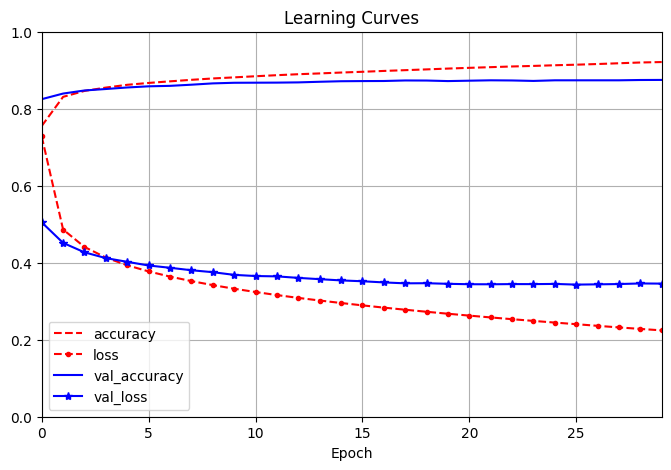

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True,
xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.title("Learning Curves")
plt.show()

In [14]:
# --- Importazioni necessarie ---
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

#Imposta il seed per riproducibilità
tf.random.set_seed(42)

#Layer di normalizzazione senza input_shape
norm_layer = tf.keras.layers.Normalization()

#Costruzione del modello con API funzionale
inputs = tf.keras.Input(shape=X_train.shape[1:])
x = norm_layer(inputs)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

#Compilazione
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

#Adattamento della normalizzazione
norm_layer.adapt(X_train)

#Addestramento
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.8643 - loss: 3.5868 - val_RootMeanSquaredError: 2.2118 - val_loss: 4.8920
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.8657 - loss: 0.7508 - val_RootMeanSquaredError: 1.4675 - val_loss: 2.1537
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7504 - loss: 0.5646 - val_RootMeanSquaredError: 1.0843 - val_loss: 1.1757
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6846 - loss: 0.4696 - val_RootMeanSquaredError: 0.8719 - val_loss: 0.7602
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6502 - loss: 0.4233 - val_RootMeanSquaredError: 0.7571 - val_loss: 0.5732
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6318 - loss: 0.3995 - val_RootMeanSquaredError: 0.6886 - val_loss: 0.4741
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6204 - los

Epoch 1/40


c:\Users\Ciro\Desktop\CorsoPython\.venv\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_53']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.7322 - loss: 3.1432 - val_RootMeanSquaredError: 0.8165 - val_loss: 0.6667
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.8117 - loss: 0.6608 - val_RootMeanSquaredError: 0.7993 - val_loss: 0.6389
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7211 - loss: 0.5211 - val_RootMeanSquaredError: 0.6860 - val_loss: 0.4706
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6737 - loss: 0.4545 - val_RootMeanSquaredError: 0.6345 - val_loss: 0.4026
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6485 - loss: 0.4210 - val_RootMeanSquaredError: 0.6108 - val_loss: 0.3731
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6338 - loss: 0.4020 - val_RootMeanSquaredError: 0.6209 - val_loss: 0.3855
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6233 - loss: 0.3888 -

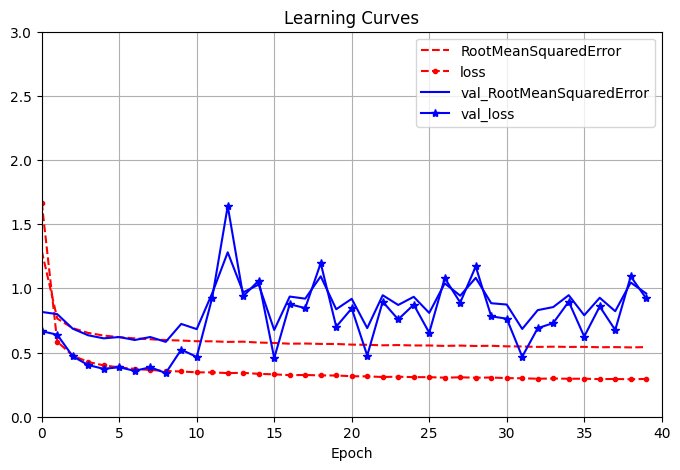

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento del dataset California Housing
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Normalizzazione: adattamento del layer ai dati di training
normalization_layer = layers.Normalization()
normalization_layer.adapt(X_train)

# Definizione manuale dei layer
hidden1 = layers.Dense(30, activation="relu")     # Primo layer hidden (30 neuroni, ReLU)
hidden2 = layers.Dense(30, activation="relu")     # Secondo layer hidden
concat_layer = layers.Concatenate()               # Layer di concatenazione
output_layer = layers.Dense(1)                    # Layer di output (regressione)

# Input simbolico: forma corrispondente al numero di feature (es. 8)
input = layers.Input(shape=X_train.shape[1:])

# Costruzione del grafo computazionale
normalized = normalization_layer(input)           # Normalizzazione (dopo adapt)
h1 = hidden1(normalized)                          # Primo hidden layer
h2 = hidden2(h1)                                  # Secondo hidden layer
concat = concat_layer([normalized, h2])           # Concatenazione di input e output hidden (wide & deep)
output = output_layer(concat)                     # Output finale

# Costruzione del modello funzionale
model = keras.Model(inputs=[input], outputs=[output])

# Compilazione del modello
model.compile(
    loss="mse",                                    # Funzione di perdita: errore quadratico medio
    optimizer=keras.optimizers.Adam(learning_rate=5e-4),  # Ottimizzatore Adam
    metrics=["RootMeanSquaredError"]               # Metica aggiuntiva: RMSE
)

# Addestramento del modello
history1 = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_valid, y_valid)
)

# Visualizzazione delle curve di apprendimento
pd.DataFrame(history1.history).plot(
    figsize=(8, 5), xlim=[0, 40], ylim=[0, 3], grid=True,
    xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.title("Learning Curves")
plt.show()

